In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [5]:
park = pd.read_csv('data/park.csv')

In [6]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [7]:
daycare = pd.read_csv('data/day_care_center.csv')

In [8]:
daycare.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [9]:
gudong = pd.read_csv('data/gu-dong.csv')

In [10]:
gudong

,city,gu,dong
0,서울특별시,NaN,서울특별시
1,서울특별시,종로구,종로구
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동
...,...,...,...
1139,부산광역시,기장군,구칠리
1140,부산광역시,기장군,이곡리
1141,부산광역시,기장군,고촌리
1142,부산광역시,기장군,안평리


## Data 합치기

In [11]:
all_data = pd.concat([train, test], sort=False)

In [12]:
all_data.shape

(1222016, 13)

## Merge 구

In [13]:
def cleanup_dong(dong):
    spt = dong.split()
    if len(spt) > 1:
        return spt[1]
    else:
        return dong

In [14]:
all_data['dong'] = all_data['dong'].apply(cleanup_dong)

In [15]:
all_data.shape

(1222016, 13)

In [16]:
right = gudong[['gu','dong']]

In [17]:
merged = pd.merge(all_data, right, on='dong', how='left')
merged.shape

(3972738, 14)

In [18]:
merged = merged.drop_duplicates('transaction_id')

In [19]:
merged['gu'].isnull().sum()

0

In [20]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [21]:
right = merged.pivot_table(index='dong', values='transaction_real_price', aggfunc='mean').reset_index().rename(columns={'transaction_real_price': 'price_mean'})
right

,dong,price_mean
0,가락동,54967.955681
1,가리봉동,24241.186441
2,가산동,26812.244082
3,가야동,20207.466579
4,가양동,32263.930082
...,...,...
468,효창동,51399.878378
469,후암동,49870.036496
470,휘경동,34295.183976
471,흑석동,63784.781627


In [22]:
merged = pd.merge(merged, right, on='dong', how='left')
merged.shape

(1222016, 15)

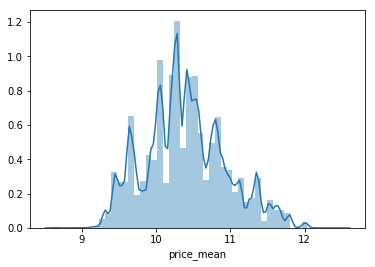

In [23]:
sns.distplot(np.log1p(merged['price_mean']))

In [24]:
merged['price_mean'] = np.log1p(merged['price_mean'])

In [25]:
right = park.pivot_table(index='dong', values='park_area', aggfunc='sum').reset_index().rename(columns={'park_area': 'park_area_sum'})
right

,dong,park_area_sum
0,가락동,102882.4
1,가산동,3650.6
2,가야동,72762.0
3,가양동,228304.5
4,갈현동,8312.8
...,...,...
232,회동동,9189.2
233,효창동,171802.0
234,후암동,2522.0
235,휘경동,6965.9


In [26]:
merged = pd.merge(merged, right, on='dong', how='left')
merged.shape

(1222016, 16)

In [27]:
merged['park_area_sum'] = merged['park_area_sum'].fillna(0)

In [28]:
right = park.pivot_table(index='dong', aggfunc='nunique')['park_name'].reset_index().rename(columns={'park_name': 'park_name_nunique'})
right

,dong,park_name_nunique
0,가락동,12
1,가산동,3
2,가야동,3
3,가양동,14
4,갈현동,6
...,...,...
232,회동동,3
233,효창동,2
234,후암동,2
235,휘경동,5


In [29]:
merged = pd.merge(merged, right, on='dong', how='left')
merged.shape

(1222016, 17)

In [30]:
merged['park_name_nunique'] = merged['park_name_nunique'].fillna(0)

In [31]:
merged.isnull().sum()

transaction_id               0
apartment_id                 0
city                         0
dong                         0
jibun                        0
apt                          0
addr_kr                      0
exclusive_use_area           0
year_of_completion           0
transaction_year_month       0
transaction_date             0
floor                        0
transaction_real_price    5463
gu                           0
price_mean                   0
park_area_sum                0
park_name_nunique            0
dtype: int64

In [32]:
daycare.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [33]:
right = pd.pivot_table(index='gu', values='day_care_baby_num', aggfunc='sum', data=daycare).reset_index().rename(columns={'day_care_baby_num':'baby_sum'})
right

,gu,baby_sum
0,강남구,11605
1,강동구,13278
2,강북구,8569
3,강서구,40462
4,관악구,11543
5,광진구,8778
6,구로구,13466
7,금정구,5251
8,금천구,8051
9,기장군,7689


In [34]:
merged = pd.merge(merged, right, on='gu', how='left')

In [35]:
merged['baby_sum'] = merged['baby_sum'].fillna(0)

In [36]:
merged.isnull().sum()

transaction_id               0
apartment_id                 0
city                         0
dong                         0
jibun                        0
apt                          0
addr_kr                      0
exclusive_use_area           0
year_of_completion           0
transaction_year_month       0
transaction_date             0
floor                        0
transaction_real_price    5463
gu                           0
price_mean                   0
park_area_sum                0
park_name_nunique            0
baby_sum                     0
dtype: int64

In [37]:
daycare.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [38]:
right = pd.pivot_table(index='gu', values='day_care_name', aggfunc='count', data=daycare).reset_index().rename(columns={'day_care_name':'day_care_count'})
right

,gu,day_care_count
0,강남구,223
1,강동구,272
2,강북구,167
3,강서구,997
4,관악구,271
5,광진구,197
6,구로구,334
7,금정구,106
8,금천구,168
9,기장군,178


In [39]:
merged = pd.merge(merged, right, on='gu', how='left')

In [40]:
merged['day_care_count'] = merged['day_care_count'].fillna(0)

In [41]:
daycare.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [42]:
daycare[daycare['gu']=='강남구']

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
7222,서울특별시,강남구,GKL행복(강남 코엑스2호점)어린이집,직장,49,NaN,NaN,NaN,NaN,NaN,2019-03-05
7223,서울특별시,강남구,GKL행복어린이집,직장,60,NaN,NaN,NaN,NaN,NaN,2019-03-05
7224,서울특별시,강남구,GS리테일 푸르니 어린이집,직장,61,NaN,NaN,NaN,NaN,NaN,2019-03-05
7225,서울특별시,강남구,IBK 참 좋은 어린이집,직장,49,NaN,NaN,NaN,NaN,NaN,2019-03-05
7226,서울특별시,강남구,LH서울어린이집,직장,34,NaN,NaN,NaN,NaN,NaN,2019-03-05
...,...,...,...,...,...,...,...,...,...,...,...
7440,서울특별시,강남구,현이어린이집,가정,20,NaN,NaN,NaN,NaN,NaN,2019-03-05
7441,서울특별시,강남구,현지아한솔어린이집,민간,37,NaN,NaN,NaN,NaN,NaN,2019-03-05
7442,서울특별시,강남구,호야 어린이집,가정,19,NaN,NaN,NaN,NaN,NaN,2019-03-05
7443,서울특별시,강남구,힐스어린이집,국공립,92,NaN,NaN,NaN,NaN,NaN,2019-03-05


In [43]:
daycare.loc[daycare['gu'] == '서초구',]['day_care_type'].value_counts()

국공립      71
가정       70
민간       41
직장       19
협동        2
법인·단체     1
Name: day_care_type, dtype: int64

In [44]:
merged.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,gu,price_mean,park_area_sum,park_name_nunique,baby_sum,day_care_count
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500.0,종로구,10.736298,0.0,0.0,4902.0,78.0
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000.0,종로구,11.034314,0.0,0.0,4902.0,78.0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500.0,종로구,11.034314,0.0,0.0,4902.0,78.0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000.0,종로구,11.588960,0.0,0.0,4902.0,78.0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000.0,종로구,11.588960,0.0,0.0,4902.0,78.0


In [45]:
merged.groupby('gu')['transaction_real_price'].mean()

gu
강남구     95167.633381
강동구     46180.322386
강북구     32846.523888
강서구     35961.630328
관악구     36149.745618
광진구     56677.571810
구로구     33589.535634
금정구     22736.463471
금천구     28286.295773
기장군     19655.473365
남구      23469.688425
노원구     29212.908481
도봉구     28289.357754
동구      18717.596677
동대문구    37643.151944
동래구     22732.195327
동작구     50891.528677
마포구     48773.237249
부산진구    17639.433635
북구      17981.371051
사상구     14933.562957
사하구     15141.810976
서구      19592.257367
서대문구    39217.828424
서초구     93760.450548
성동구     52163.849447
성북구     38026.405408
송파구     69447.390203
수영구     26188.155107
양천구     51454.592093
연제구     24178.487135
영도구     13689.851071
영등포구    46139.706259
용산구     84635.434044
은평구     38371.311883
종로구     30060.335918
중구      44087.587535
중랑구     30611.301468
해운대구    26480.332967
Name: transaction_real_price, dtype: float64

In [46]:
right = merged.pivot_table(index='gu', values='apt', aggfunc=pd.Series.nunique).reset_index().rename(columns={'apt':'apt_nunique'})
right

,gu,apt_nunique
0,강남구,595
1,강동구,459
2,강북구,121
3,강서구,589
4,관악구,288
5,광진구,208
6,구로구,614
7,금정구,431
8,금천구,157
9,기장군,158


In [47]:
merged['apt'].nunique()

10484

In [48]:
len(merged['apt'])

1222016

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

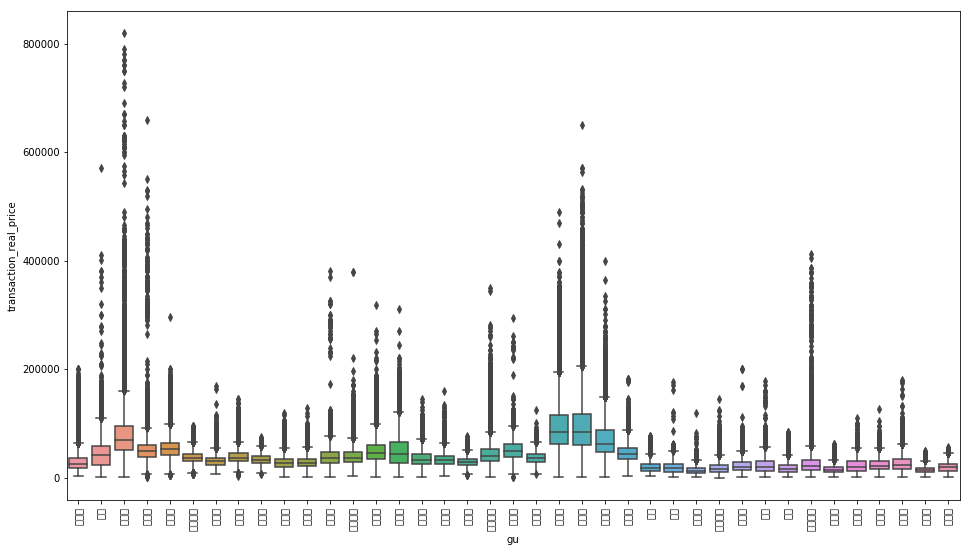

In [49]:
plt.figure(figsize=(16, 9))
sns.boxplot(x=merged['gu'], y=merged['transaction_real_price'])
plt.xticks(rotation=90)

In [50]:
merged['city_code'] = merged['city'].astype('category').cat.codes

In [51]:
merged['city_code'].value_counts()

1    746196
0    475820
Name: city_code, dtype: int64

In [52]:
merged['dong_code'] = merged['dong'].astype('category').cat.codes

In [53]:
merged['gu_code'] = merged['gu'].astype('category').cat.codes

In [54]:
def split_year(year_month):
    year_month = str(year_month)
    return int(year_month[:4])

def split_month(year_month):
    year_month = str(year_month)
    return int(year_month[4:])

In [55]:
merged['transaction_year'] = merged['transaction_year_month'].apply(split_year)
merged['transaction_month'] = merged['transaction_year_month'].apply(split_month)

In [56]:
merged['transaction_year'].value_counts()

2015    181195
2016    165664
2014    136649
2017    129361
2009    127869
2013    109738
2010    102823
2008    100066
2011     98586
2012     70065
Name: transaction_year, dtype: int64

In [57]:
merged.loc[merged['transaction_date'] == '21~28', 'transaction_date'] = '21~31'
merged.loc[merged['transaction_date'] == '21~29', 'transaction_date'] = '21~31'
merged.loc[merged['transaction_date'] == '21~30', 'transaction_date'] = '21~31'

In [58]:
merged['transaction_date'].value_counts()

21~31    418380
11~20    410246
1~10     393390
Name: transaction_date, dtype: int64

In [59]:
merged['transaction_date_code'] = merged['transaction_date'].astype('category').cat.codes

Text(0, 0.5, '집 가격')

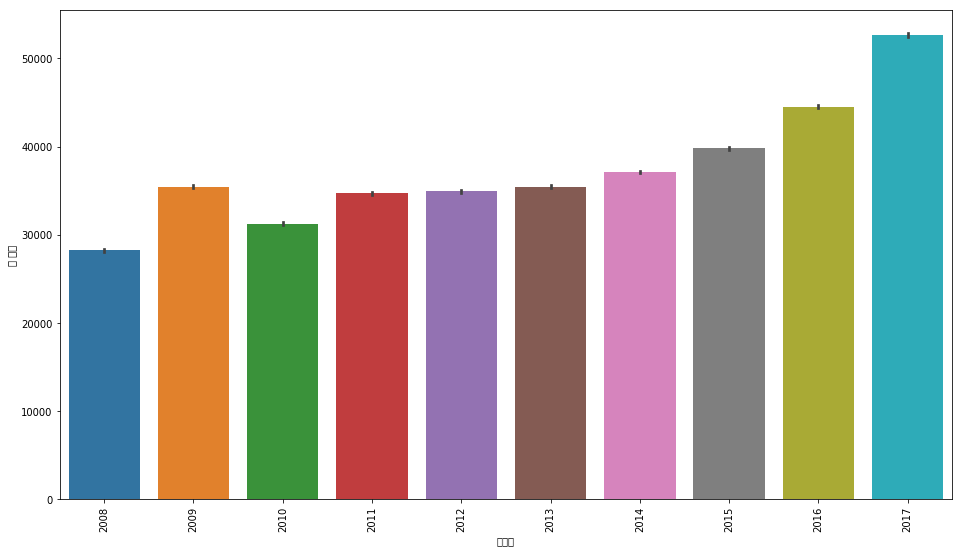

In [60]:
plt.figure(figsize=(16, 9))
sns.barplot(x='transaction_year', y='transaction_real_price', data=merged)
plt.xticks(rotation=90)
plt.xlabel('연도별')
plt.ylabel('집 가격')

In [61]:
merged.shape

(1222016, 25)

In [62]:
merged.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,park_area_sum,park_name_nunique,baby_sum,day_care_count,city_code,dong_code,gu_code,transaction_year,transaction_month,transaction_date_code
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,...,0.0,0.0,4902.0,78.0,1,263,35,2008,1,2
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,...,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,...,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,...,0.0,0.0,4902.0,78.0,1,64,35,2008,1,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,...,0.0,0.0,4902.0,78.0,1,64,35,2008,1,2


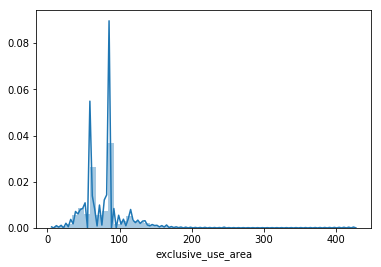

In [63]:
sns.distplot(train['exclusive_use_area'])

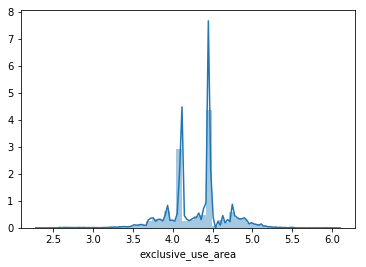

In [64]:
sns.distplot(np.log1p(train['exclusive_use_area']))

In [65]:
merged.columns

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price', 'gu', 'price_mean', 'park_area_sum',
       'park_name_nunique', 'baby_sum', 'day_care_count', 'city_code',
       'dong_code', 'gu_code', 'transaction_year', 'transaction_month',
       'transaction_date_code'],
      dtype='object')

In [66]:
merged = merged.drop(['transaction_id', 'apartment_id', 'transaction_date', 'transaction_year_month', 'city', 'dong', 'jibun', 'apt', 'addr_kr', 'gu'], 1)

In [67]:
merged.head()

,exclusive_use_area,year_of_completion,floor,transaction_real_price,price_mean,park_area_sum,park_name_nunique,baby_sum,day_care_count,city_code,dong_code,gu_code,transaction_year,transaction_month,transaction_date_code
0,84.82,2002,2,37500.0,10.736298,0.0,0.0,4902.0,78.0,1,263,35,2008,1,2
1,99.17,1973,6,20000.0,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
2,84.74,2007,6,38500.0,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
3,146.39,2003,15,118000.0,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,0
4,194.43,2004,3,120000.0,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,2


In [68]:
merged['exclusive_use_area'] = np.log1p(merged['exclusive_use_area'])

In [69]:
merged.head()

,exclusive_use_area,year_of_completion,floor,transaction_real_price,price_mean,park_area_sum,park_name_nunique,baby_sum,day_care_count,city_code,dong_code,gu_code,transaction_year,transaction_month,transaction_date_code
0,4.452252,2002,2,37500.0,10.736298,0.0,0.0,4902.0,78.0,1,263,35,2008,1,2
1,4.606869,1973,6,20000.0,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
2,4.451319,2007,6,38500.0,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
3,4.993082,2003,15,118000.0,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,0
4,5.275202,2004,3,120000.0,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,2


In [70]:
merged.shape

(1222016, 15)

In [71]:
merged.columns

Index(['exclusive_use_area', 'year_of_completion', 'floor',
       'transaction_real_price', 'price_mean', 'park_area_sum',
       'park_name_nunique', 'baby_sum', 'day_care_count', 'city_code',
       'dong_code', 'gu_code', 'transaction_year', 'transaction_month',
       'transaction_date_code'],
      dtype='object')

In [72]:
label = [
    'transaction_real_price'
]

In [73]:
data = merged[:len(train)]

In [74]:
target = merged[len(train):]

In [75]:
data.shape, target.shape

((1216553, 15), (5463, 15))

In [76]:
x_train = data.drop('transaction_real_price', 1)
y_train = data['transaction_real_price']

In [77]:
x_test = target.drop('transaction_real_price', 1)

In [78]:
x_train.head()

,exclusive_use_area,year_of_completion,floor,price_mean,park_area_sum,park_name_nunique,baby_sum,day_care_count,city_code,dong_code,gu_code,transaction_year,transaction_month,transaction_date_code
0,4.452252,2002,2,10.736298,0.0,0.0,4902.0,78.0,1,263,35,2008,1,2
1,4.606869,1973,6,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
2,4.451319,2007,6,11.034314,0.0,0.0,4902.0,78.0,1,437,35,2008,1,1
3,4.993082,2003,15,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,0
4,5.275202,2004,3,11.588960,0.0,0.0,4902.0,78.0,1,64,35,2008,1,2


In [79]:
y_train = np.log1p(y_train)

In [80]:
y_train.head()

0    10.532123
1     9.903538
2    10.558439
3    11.678448
4    11.695255
Name: transaction_real_price, dtype: float64

## Scoring

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [82]:
def get_score(model):
    x_tr, x_te, y_tr, y_te = train_test_split(x_train, y_train, test_size=0.2)
    pred = model.fit(x_tr, y_tr).predict(x_te)
    return np.sqrt(mean_squared_error(np.expm1(pred), np.expm1(y_te)))

## Modeling

In [85]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingCVRegressor

In [86]:
lassoCV = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=34, cv=kf))
elasticnetCV = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio))                                
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

NameError: name 'alphas2' is not defined

In [ ]:
lgbm = LGBMRegressor(objective='regression', 
                     learning_rate=0.1, 
                     num_leaves=15,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     n_estimators=5000,
                     verbose=1,
                    )

In [ ]:
print("lgbm   : {0:.2f}, ".format(get_score(lgbm)))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber', 
                                random_state =42)   
print("gbr   : {0:.2f}, ".format(get_score(gbr)))

In [ ]:
stack_reg = StackingCVRegressor(regressors=(ridgeCV, lassoCV, elasticnetCV, gbr, xgb, lgbm),
                                meta_regressor=xgb,
                                use_features_in_secondary=True, n_jobs=-1)

In [ ]:
ridgeCV = make_pipeline(RobustScaler(), RidgeCV(cv=kf, alphas=[0.1, 0.5, 1.0, 10.0, 30.0]))

In [ ]:
get_score(ridgeCV)

In [ ]:
ridgeCV_pred = ridgeCV.fit(x_train, y_train).predict(x_test)

In [ ]:
ridgeCV_pred = np.expm1(ridgeCV_pred)
ridgeCV_pred

In [ ]:
lgbm = LGBMRegressor(objective='regression', 
                     learning_rate=0.1, 
                     num_leaves=15,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     n_estimators=5000,
                     verbose=1,
                    )

In [ ]:
%time print("lgbm   : {0:.2f}, ".format(get_score(lgbm)))

In [ ]:
lgbm_pred = lgbm.fit(x_train, y_train).predict(x_test)
lgbm_pred = np.expm1(lgbm_pred)

In [ ]:
xgb = XGBRegressor(learning_rate=0.025,
                   n_estimators=1000,
                   max_depth=12,
                   subsample=0.8,
                   colsample_bytree=0.8,
                   objective='reg:squarederror',
                   tree_method='gpu_hist',
                   verbose=1,
                  )

In [ ]:
%time print("xgb   : {0:.2f}, ".format(get_score(xgb)))

In [ ]:
xgb_pred = xgb.fit(x_train, y_train).predict(x_test)
xgb_pred = np.expm1(xgb_pred)

In [ ]:
rfr = RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [ ]:
%time print("rfr   : {0:.2f}, ".format(get_score(rfr)))

In [ ]:
rfr_pred = rfr.fit(x_train, y_train).predict(x_test)
rfr_pred = np.expm1(rfr_pred)

In [ ]:
rfr_pred.shape

In [ ]:
prediction = 0.3 * lgbm_pred + 0.3 * xgb_pred + 0.4 * rfr_pred

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression(normalize=False, n_jobs=-1)

In [ ]:
linear.fit(x_train, y_train)

In [ ]:
get_score(linear)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [ ]:
kf = KFold(10)

In [ ]:
lassoCV = LassoCV(max_iter=1e7, alphas=[5e-05, 0.00001, 0.001, 0.01, 0.1, 5, 10, 20, 30], random_state=30, cv=kf, n_jobs=-1)

In [ ]:
lassoCV.fit(x_train, y_train)

In [ ]:
get_score(lassoCV)

In [ ]:
model = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
get_score(model)

In [ ]:
pd.DataFrame(list(zip(x_train.columns, model.feature_importances_))).sort_values(1, ascending=False)

In [ ]:
rfr_pred = model.predict(x_test)
rfr_pred = np.expm1(rfr_pred)

In [ ]:
xgb = XGBRegressor(learning_rate=0.025,
                   n_estimators=400,
                   max_depth=9,
                   subsample=0.7,
                   colsample_bytree=0.7,
                   objective='reg:squarederror',
                   tree_method='gpu_hist',
                   verbose=1,
                  )

In [ ]:
xgb.fit(x_train, y_train)

In [ ]:
merged.corr()['transaction_real_price']

In [ ]:
pd.DataFrame(list(zip(x_train.columns, xgb.feature_importances_))).sort_values(1, ascending=False)

In [ ]:
xgb_pred = xgb.predict(x_test)
xgb_pred = np.expm1(xgb_pred)

In [ ]:
pred = rfr_pred * 0.7 + xgb_pred * 0.3

In [ ]:
plt.figure(figsize=(12, 9))
sns.distplot(pred)

## Make Submission

In [ ]:
submission = pd.read_csv('data/submission.csv')

In [ ]:
submission.head()

In [ ]:
submission['transaction_real_price'] = pred

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission/submission.csv', index=False)